# Automatic Jupyter Notebook : Scenario 2
This is an auto-generated notebook generated using the classifAI DSL on : 22/01/2023 18:11:56

## Selection of data

In [11]:
import os
import numpy as np
from PIL import Image

In [12]:
X = []
Y = []
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classes_count = {'0': 5923, '1': 6742, '2': 5958, '3': 6131, '4': 5842, '5': 5421, '6': 5918, '7': 6265, '8': 5851, '9': 5949}
for class_ in classes:
	count = 0
	for file in os.listdir(f'input_data/' + class_):
		if count == classes_count[class_]:
			break
		X.append(np.array(Image.open(f'input_data/' + class_ + '/' + file)))
		Y.append(class_)
		count += 1
X=np.array(X)
Y=np.array(Y)
print("X shape :",X.shape)
print("Y shape :",Y.shape)

X shape : (60000, 28, 28)
Y shape : (60000,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Preprocessing of data

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

## Transformation of data

### Normalization of data

In [15]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train / 255
X_test = X_test / 255
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (48000, 28, 28)
X test shape : (12000, 28, 28)


### Reshaping of data

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("X train shape :",X_train.shape)
print("X train shape :",X_test.shape)

X train shape : (48000, 28, 28, 1)
X train shape : (12000, 28, 28, 1)


## Data Mining

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Keeping track of the models and the metrics

In [18]:
models_metrics = dict()

### Classifier : rank 1 - number 1

Creating the model

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Training and evaluating the model

In [20]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-1"] = [history, score, model]

Epoch 1/10
1500/1500 [==============================] - 45s 29ms/step - loss: 2.3862 - accuracy: 0.1019
Epoch 2/10
1500/1500 [==============================] - 39s 26ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 3/10
1500/1500 [==============================] - 41s 27ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 4/10
1500/1500 [==============================] - 38s 25ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 5/10
1500/1500 [==============================] - 33s 22ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 6/10
1500/1500 [==============================] - 33s 22ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 8/10
1500/1500 [==============================] - 31s 21ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 9/10
1500/1500 [==============================] - 32s 21ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 10/10
375/375 [==============================] - 3s 7ms/st

### Classifier : rank 1 - number 2

Creating the model

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

Training and evaluating the model

In [22]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-2"] = [history, score, model]

Epoch 1/10
1500/1500 [==============================] - 37s 24ms/step - loss: 2.3308 - accuracy: 0.0997
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 3/10
1500/1500 [==============================] - 37s 24ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 4/10
1500/1500 [==============================] - 39s 26ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 6/10
1500/1500 [==============================] - 39s 26ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 7/10
1500/1500 [==============================] - 36s 24ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 8/10
1500/1500 [==============================] - 39s 26ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 9/10
1500/1500 [==============================] - 37s 24ms/step - loss: 2.3026 - accuracy: 0.0995
Epoch 10/10
375/375 [==============================] - 3s 8ms/st

## Comparison of classifiers

### Importing libraries

In [23]:
import matplotlib.pyplot as plt

### Plotting the metrics

#### Plot of the accuracy

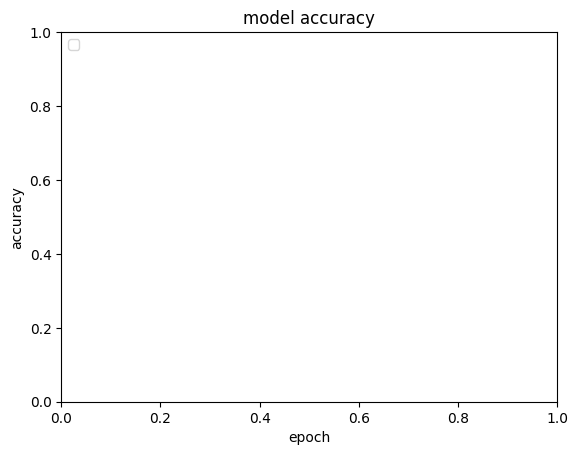

In [24]:
# Plot accuracy of the classifiers
for key, value in models_metrics.items():
	if value[1][1] >= 0.5 and value[1][0] <= 0.5:
		history = value[0]
		plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

#### Plot of the loss

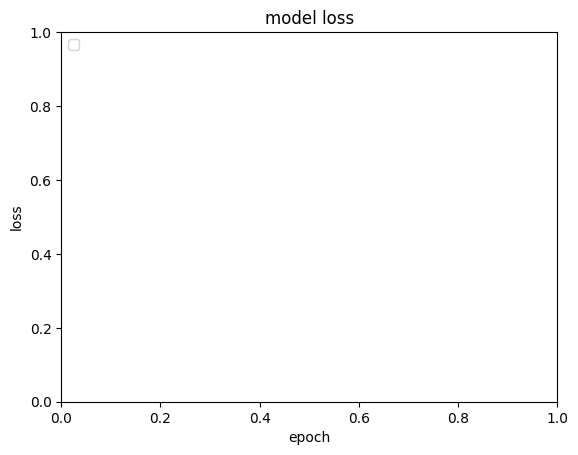

In [25]:
# Plot loss of the classifiers
for key, value in models_metrics.items():
	if value[1][1] >= 0.5 and value[1][0] <= 0.5:
		history = value[0]
		plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

## Deploying the best model

### Finding the best model according to the accuracy

In [26]:
best_model = None        
best_accuracy = 0        
for key, value in models_metrics.items():            
	accuracy = value[1][1]            
	if accuracy > best_accuracy:                
		best_accuracy = accuracy                
		best_model = value[2]        
print(f"Best model accuracy: {best_accuracy}")

Best model accuracy: 0.09541666507720947


### Saving the best model

In [27]:
best_model.save("../prediction-app/model/model.h5")        
print("The best model has been saved in the directory ../prediction-app/model/model.h5")

The best model has been saved in the directory ../prediction-app/model/model.h5


### Setting the name of the application

In [28]:
with open("../prediction-app/.env", "w") as file:        
	file.write("APP_NAME=\"My Prediction App Scenario2\"")

### Instructions for running the application

1. Open the terminal and go to the directory ../prediction-app

2. Run the command: steamlit run app.py

3. Open the browser and go to the address: http://localhost:8501